In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/insurance.csv')

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


convert categorical data into numeric

In [13]:
X = pd.get_dummies(X, drop_first=True)

In [14]:
X = df.drop('charges', axis=1)
y = df['charges']

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
from sklearn.linear_model import LinearRegression

In [20]:
re =LinearRegression()
re.fit(X_train, y_train)

LinearRegression()

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [24]:
y_pred = re.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R²: {r2}')

MAE: 3933.2726494052426
MSE: 31827950.229523838
RMSE: 5641.62655885019
R²: 0.7999876970680433


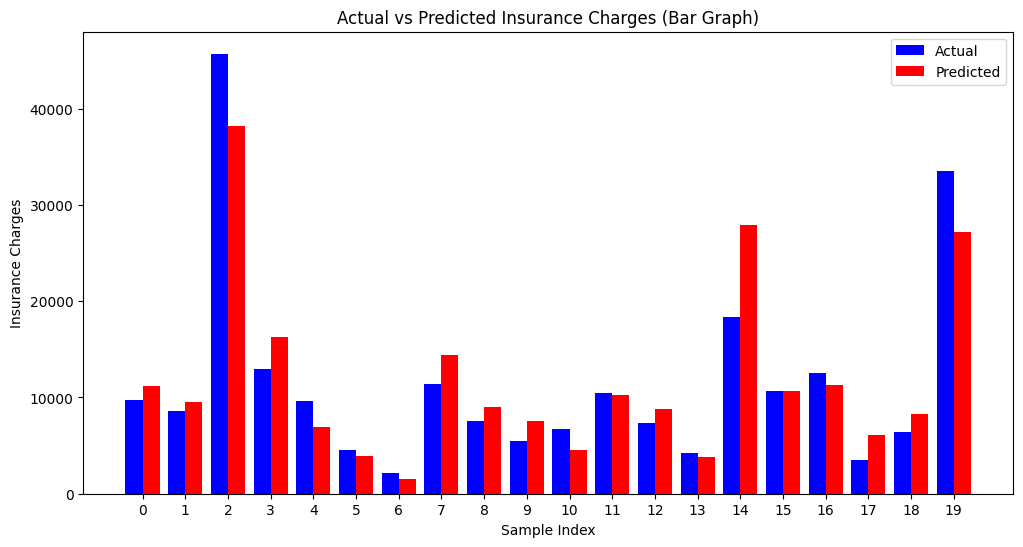

In [28]:
n_samples = 20
indices = np.arange(n_samples)

plt.figure(figsize=(12,6))
plt.bar(indices - 0.2, y_test[:n_samples], width=0.4, label='Actual', color='blue')
plt.bar(indices + 0.2, y_pred[:n_samples], width=0.4, label='Predicted', color='red')
plt.xlabel('Sample Index')
plt.ylabel('Insurance Charges')
plt.title('Actual vs Predicted Insurance Charges (Bar Graph)')
plt.xticks(indices)
plt.legend()
plt.show()